In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [5]:
df_train = pd.read_csv("../train.csv", encoding="latin-1")
df_test = pd.read_csv("../test.csv", encoding="latin-1")
df_attr = pd.read_csv("../attributes.csv")
df_desc = pd.read_csv("../product_descriptions.csv")

In [6]:
df_brand = df_attr[df_attr.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

In [63]:
#Print train column names
print(list(df_train))

['id', 'product_uid', 'product_title', 'search_term', 'relevance']


In [64]:
#Print test column names
print(list(df_test))

['id', 'product_uid', 'product_title', 'search_term']


In [8]:
#Print attribute column names
print(list(df_attr))
print(len(df_attr))

['product_uid', 'name', 'value']
2044803


In [66]:
#Print Description column names
print(list(df_desc))

['product_uid', 'product_description']


In [67]:
#Merge all the data
df_train = pd.merge(df_train, df_desc, how='left', on='product_uid')
df_train = pd.merge(df_train, df_brand, how='left', on='product_uid')

df_train[200:]

,id,product_uid,product_title,search_term,relevance,product_description,brand
200,662,100110,Ryobi Expand-It 10 in. Universal Pole Saw Atta...,expand it universal products,2.33,The Ryobi Expand-It 10 in. A Pole Saw Attachme...,Ryobi
201,663,100110,Ryobi Expand-It 10 in. Universal Pole Saw Atta...,pole saw,2.67,The Ryobi Expand-It 10 in. A Pole Saw Attachme...,Ryobi
202,666,100110,Ryobi Expand-It 10 in. Universal Pole Saw Atta...,ryobi pole saw,2.67,The Ryobi Expand-It 10 in. A Pole Saw Attachme...,Ryobi
203,668,100110,Ryobi Expand-It 10 in. Universal Pole Saw Atta...,ryobi trimmers,2.67,The Ryobi Expand-It 10 in. A Pole Saw Attachme...,Ryobi
204,669,100110,Ryobi Expand-It 10 in. Universal Pole Saw Atta...,trimmer attachment,2.00,The Ryobi Expand-It 10 in. A Pole Saw Attachme...,Ryobi
205,670,100111,Prime-Line Fiberglass Screening Kit with Rolli...,fiberglass repair kit,3.00,This Prime-Line Products Fiberglass Screening ...,Prime-Line
206,671,100111,Prime-Line Fiberglass Screening Kit with Rolli...,fiberglass repir kit,1.67,This Prime-Line Products Fiberglass Screening ...,Prime-Line
207,674,100112,Rug Doctor Universal Upholstery Hand Tool Atta...,rug doctor carpet cleaner,2.00,The Rug Doctor Universal Upholstery Hand Tool ...,Rug Doctor
208,677,100113,Amerelle Line Voltage Halogen Bronze Pucks (5-...,under cabinet lighting,2.67,"Whether you want to highlight a work of art, l...",Amerelle
209,679,100114,Baled Pine Straw,pine straw,3.00,The Baled Pine Straw can be used as ground cov...,Unbranded


In [68]:
list(df_train)

['id',
 'product_uid',
 'product_title',
 'search_term',
 'relevance',
 'product_description',
 'brand']

In [69]:
#Number Of Each Product By ID
df_train.product_uid.value_counts()

101959    21
102893    21
101892    18
104691    17
101539    17
102456    17
103763    15
109594    14
102234    14
100409    14
101442    14
120606    14
102162    14
101312    14
107728    14
100065    13
102567    13
100468    13
100941    13
101034    13
102302    12
100710    12
101073    12
122915    12
100898    11
100264    11
100068    11
101399    11
106269    10
104260    10
          ..
129431     1
123284     1
119186     1
115088     1
203147     1
176510     1
119250     1
125397     1
197128     1
129495     1
178687     1
170491     1
166393     1
164344     1
188916     1
184818     1
180720     1
143854     1
139756     1
137707     1
135658     1
133609     1
131560     1
160230     1
158181     1
156132     1
154083     1
113119     1
100825     1
133121     1
Name: product_uid, dtype: int64

In [70]:
# Number Of Unique Products By ID
len(df_train.product_uid.value_counts())

54667

In [71]:
# Number of Each Product By Tile
df_train.product_title.value_counts()

Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Custom Building Products VersaBond Gray 50 lb. Fortified Thin-Set Mortar                                                 17
Ryobi ONE+ 18-Volt Lithium-Ion Ultimate Combo Kit (6-Tool)                                                               17
Ryobi ONE+ 18-Volt Lithium-Ion Cordless Drill/Driver and Impact Driver Kit (2-Tool)                                      17
Whirlpool Gold Series Top Control Dishwasher in Monochromatic Stainless Steel with Silverware Spray                      15
DEWALT 20-Volt Max Lithium-Ion Cordless Combo Kit (2-Tool)                                                               14
Owens Co

In [72]:
# Number of Unique Products By Tile
len(df_train.product_title.value_counts())

53489

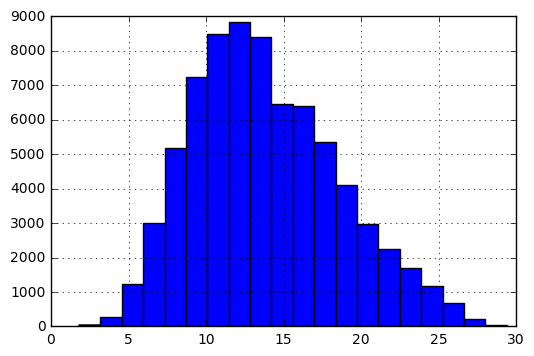

In [73]:
# Distribution of Title Length 
(df_train.product_title.str.len()/5).hist(bins=20)
plt.show()

In [74]:
#Number of Each Brand
df_train.brand.value_counts()

Unbranded                     2165
Hampton Bay                   1446
GE                             959
Everbilt                       840
Home Decorators Collection     769
KOHLER                         731
DEWALT                         665
Delta                          612
Philips                        570
Ryobi                          566
Glacier Bay                    533
Prime-Line                     530
MOEN                           459
Milwaukee                      456
Veranda                        446
RIDGID                         439
Lithonia Lighting              379
LG Electronics                 362
Husky                          358
Daltile                        345
Crown Bolt                     339
Whirlpool                      336
HDX                            331
American Standard              313
MS International               287
SharkBite                      277
Bosch                          266
Makita                         261
BLACK+DECKER        

In [75]:
# Number Of Unique Brands
len(df_train.brand.value_counts())

3143

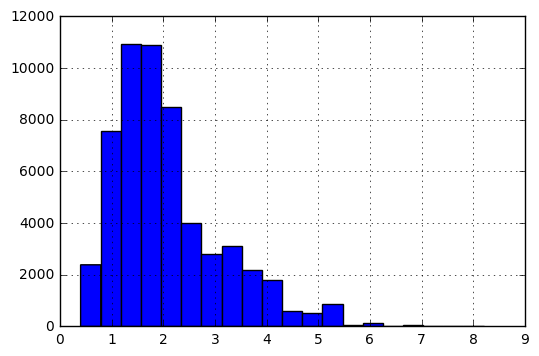

In [76]:
# Distribution of Brand Length 
(df_train.brand.str.len()/5).hist(bins=20)
plt.show()

In [77]:
#Number of Each Query
df_train.search_term.value_counts()

anderson windows 400 seriesimpact resistant    16
everblit heavy duty canvas dropcloth           16
moen chat oil bronze tub/shower faucet         16
3 WAY TOGGLE SWITCH                            16
contact paoer                                  16
1/2 zip wall                                   16
metal sheet                                    16
burgundy red foot stools                       16
bed frames headboaed                           16
window paint                                   15
bosch hole saw                                 15
zinc plated flatbraces                         15
decorative window sheeting                     15
sawtrax all terrain                            15
w g 918                                        15
48 bath vanity                                 15
wrt111sfdb ice maker                           15
3/8 coupler                                    15
halloween light                                15
polished chrome cbinet pulls                   15


In [78]:
#Number Of Unique Queries 
len(df_train.search_term.value_counts())

11795

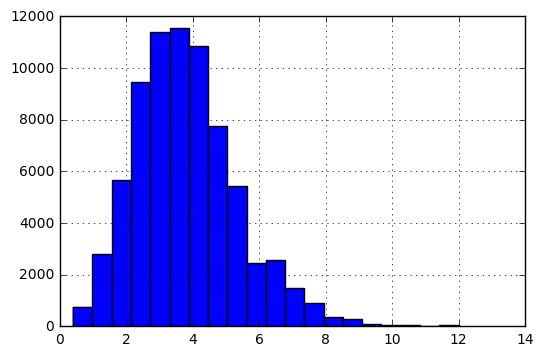

In [79]:
# Distribution of Query Length 
(df_train.search_term.str.len()/5).hist(bins=20)
plt.show()

In [80]:
#Number of Each Description
df_train.product_description.value_counts()

Ready to assemble means you save with Heartland Cabinetry.  Heartland Cabinets are shipped to you unassembled.  Each cabinet comes with simple assembly and installation instructions that require only standard household tools.  Make your home a special place for everyday living.  Heartland Cabinetry captures the classic style and grace that creates a charming setting for any gathering.  Items take time to assemble, but will withstand years of use.  Two people are suggested for proper assembly.EZ hang system simplifies installation by supporting wall cabinets while they are secured in placeFully-reversible door mounts on left or rightAdjustable full-depth wall shelves allow for maximum storageSelf-locking shelf clips prevent shelves from tippingConstructed of sturdy engineered woodQuick and easy metal cam and glue dowel assemblyInterior cabinet surfaces, including shelves, highly water resistant6 way adjustable concealed door hingesFinished toe kick base cabinetsDeep, full extension draw

In [81]:
# Number Of Unique Descriptions
len(df_train.product_description.value_counts())

50258

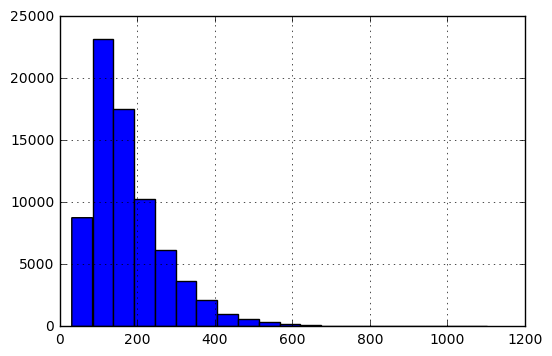

In [82]:
# Distribution of Description Length
(df_train.product_description.str.len()/5).hist(bins=20)
plt.show()

In [83]:
# Number Of Each Relevance
df_train.relevance.value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

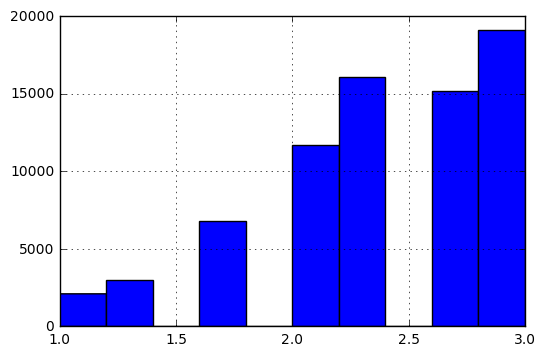

In [84]:
# Distribution of Relevance 
df_train.relevance.hist()
plt.show()

In [85]:
# Most Common Words In Search Term
words = collections.Counter()
for title in df_train.search_term:
    words.update(title.lower().split())

words.most_common()

[('door', 2679),
 ('light', 2021),
 ('for', 1815),
 ('in', 1665),
 ('inch', 1487),
 ('wall', 1442),
 ('shower', 1429),
 ('with', 1417),
 ('white', 1354),
 ('wood', 1349),
 ('x', 1347),
 ('tile', 1338),
 ('and', 1165),
 ('paint', 1145),
 ('cabinet', 1061),
 ('outdoor', 1052),
 ('water', 1034),
 ('vanity', 977),
 ('kitchen', 969),
 ('bathroom', 963),
 ('doors', 960),
 ('gas', 925),
 ('led', 899),
 ('lights', 840),
 ('air', 839),
 ('ceiling', 805),
 ('sink', 801),
 ('2', 780),
 ('1/2', 772),
 ('faucet', 772),
 ('kit', 770),
 ('floor', 766),
 ('saw', 736),
 ('4', 733),
 ('fan', 729),
 ('black', 727),
 ('pipe', 725),
 ('steel', 710),
 ('window', 697),
 ('lighting', 691),
 ('electric', 669),
 ('metal', 658),
 ('1', 637),
 ('glass', 624),
 ('patio', 602),
 ('heater', 596),
 ('3', 588),
 ('toilet', 580),
 ('pvc', 580),
 ('wire', 568),
 ('6', 564),
 ('12', 560),
 ('fence', 548),
 ('cover', 531),
 ('drill', 527),
 ('plastic', 521),
 ('bulb', 521),
 ('tub', 499),
 ('base', 498),
 ('top', 495),
 (

In [86]:
# Number Of Unique Words In Search Term
print(len(words))

8433


In [87]:
# Most Common Words In Title
words = collections.Counter()
for title in df_train.product_title:
    words.update(title.lower().split())

words.most_common()

[('in.', 57172),
 ('x', 28109),
 ('ft.', 14837),
 ('in', 14635),
 ('with', 13045),
 ('white', 9208),
 ('and', 8566),
 ('steel', 4736),
 ('door', 4620),
 ('4', 4381),
 ('kit', 4244),
 ('light', 4117),
 ('wall', 3994),
 ('black', 3607),
 ('6', 3599),
 ('12', 3582),
 ('8', 3480),
 ('-', 3273),
 ('2', 3117),
 ('for', 2966),
 ('1', 2956),
 ('stainless', 2917),
 ('home', 2901),
 ('tile', 2780),
 ('bay', 2403),
 ('3', 2369),
 ('led', 2358),
 ('vanity', 2332),
 ('10', 2306),
 ('1/2', 2301),
 ('bronze', 2242),
 ('wood', 2230),
 ('24', 2141),
 ('cabinet', 2134),
 ('5', 2107),
 ('w', 2099),
 ('top', 2098),
 ('collection', 2070),
 ('electric', 2052),
 ('nickel', 1977),
 ('gas', 1965),
 ('36', 1908),
 ('hampton', 1908),
 ('shower', 1904),
 ('chrome', 1871),
 ('paint', 1865),
 ('oz.', 1841),
 ('outdoor', 1804),
 ('set', 1804),
 ('sq.', 1800),
 ('cu.', 1785),
 ('glass', 1773),
 ('3/4', 1766),
 ('faucet', 1676),
 ('gal.', 1667),
 ('30', 1649),
 ('vinyl', 1593),
 ('series', 1567),
 ('lighting', 1563),


In [88]:
# Number Of Unique Words In Title
print(len(words))

28121
